In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Citation Requet
#----------------------------------------------------------------------------------------
# 1. Spatial information
#---------------------------
# X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

# 2. Temporal information
#---------------------------
# month - month of the year: ‘jan’ to ‘dec’
# day - day of the week: ‘mon’ to ‘sun’

# 3. FWI , FFMC, DMC, DC, and ISI
#----------------------------------
# FWI: The forest Fire Weather Index (FWI) is the Canadian system for rating fire danger
# FFMC - FFMC index denotes the moisture content surface litter and influences ignition and fire spread: 18.7 to 96.20
# DMC - DMC index represent the moisture content of shallow organic layers: 1.1 to 291.3
# DC - DC index represent the moisture content of deep organic layers: 7.9 to 860.6
# ISI - ISI index is a score that correlates with fire velocity spread: 0.0 to 56.10

# 4. Meteorological information
#--------------------------------
# temp - temperature in Celsius degrees: 2.2 to 33.30
# RH - relative humidity in %: 15.0 to 100
# wind - wind speed in km/h: 0.40 to 9.40
# rain - outside rain in mm/m2 : 0.0 to 6.4

# 5. area
#-----------
# area - the burned area of the forest (in ha): 0.00 to 1090.84

In [3]:
# Read the forest fire data
fire_df = pd.read_csv("./data/forestfires.csv")

# Display the data table for preview
fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# change the area to binary, where area = 1 means a fire happened and area= 0  means there was no fire
fire_df.loc[fire_df['area'] > 0, 'area'] = 1

#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
fire_df['area'] = le.fit_transform(fire_df['area'])
fire_df['month'] = le.fit_transform(fire_df['month'])



#display the initial records
fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,7,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,7,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [5]:
#remove unnessecary columns
fire_df = fire_df.drop(columns=['X','Y','day'])
fire_df.head()

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [6]:
#select columns other than area
cols = [col for col in fire_df.columns if col not in ['area']]

X = fire_df[cols]

#assigning the Area column as target
target = fire_df['area']

X.head(n=2)

,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0


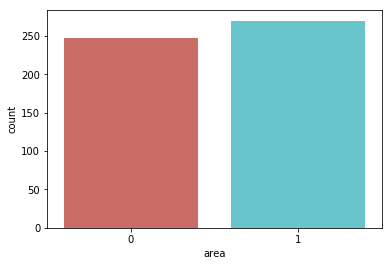

In [7]:
# Ensure we have a binary dependent variable. Use Seaborn for this.
sns.countplot(x='area',data=fire_df, palette='hls')


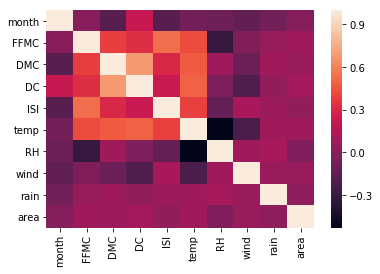

In [8]:
#Check for independence between features
sns.heatmap(fire_df.corr())

In [9]:
#Linear regression
#--------------------------------------

# Create a linear regression model
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, target, test_size=0.33, random_state=42)

In [11]:
# Fit (train) the model with the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -0.2778132259868603


In [13]:
# Number of coefficients: 
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 9


In [14]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['features', 'coefficients'])
fc_df

,features,coefficients
0,month,0.002655
1,FFMC,0.005212
2,DMC,-0.000145
3,DC,0.000115
4,ISI,-0.001111
5,temp,0.003775
6,RH,0.002197
7,wind,0.029644
8,rain,0.018327


In [15]:
# Use the test data to create predictions and show the first 5
y_pred = lm.predict(X_test)
y_pred[0:5]

array([0.58657286, 0.64529348, 0.45670722, 0.61720313, 0.57589345])

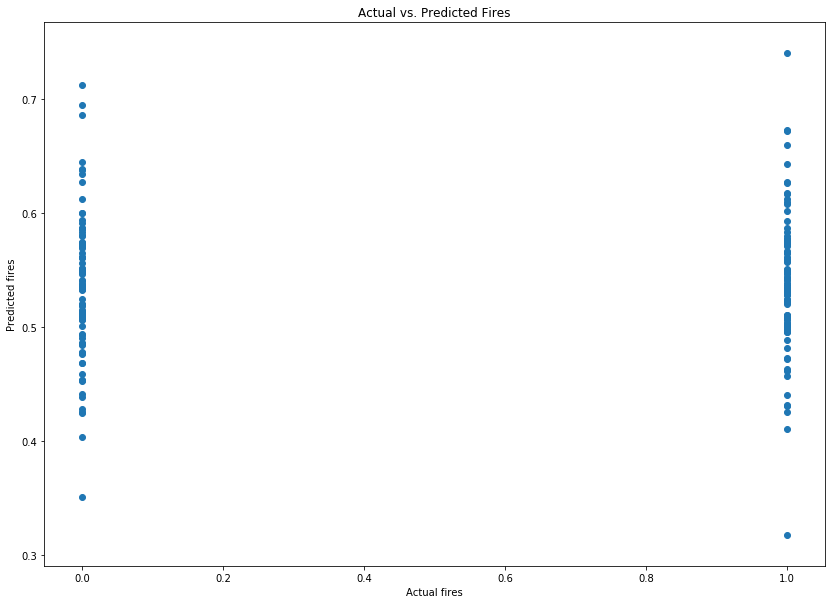

In [16]:
# Create a plot to compare actual fires (Y_test) and the predicted fires (pred_test)
fig = plt.figure(figsize=(14,10))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual fires")
plt.ylabel("Predicted fires")
plt.title("Actual vs. Predicted Fires")
plt.show()

In [17]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, lm.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 0.24374843138902844


In [18]:
# Get the MSE for a single feature for comparison
lm2 = LinearRegression()
lm2.fit(X[['ISI']], target)

mse2 = mean_squared_error(target, lm2.predict(X[['ISI']]))
print("MSE All Data Single Feature: {}".format(mse2))

MSE All Data Single Feature: 0.24918788684584592


In [19]:
#Variance Score
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: -0.01


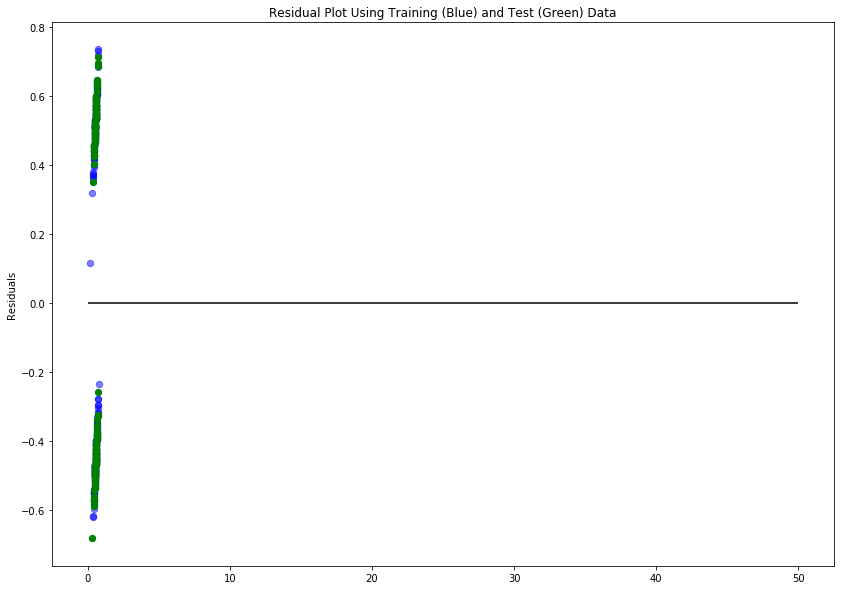

In [20]:
# Create a residual plot
fig = plt.figure(figsize=(14,10))
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.ylabel("Residuals")
plt.title("Residual Plot Using Training (Blue) and Test (Green) Data")
plt.show()

In [21]:
print(f"Training Data Score: {lm.score(X_train, Y_train)}")
print(f"Testing Data Score: {lm.score(X_test, Y_test)}")

Training Data Score: 0.020292522673529434
Testing Data Score: -0.013228319237512887


In [22]:
#logistic regression
#--------------------------

from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.33, random_state=42)

In [23]:

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
print(f"Training Data Score: {lr.score(X_train, Y_train)}")
print(f"Testing Data Score: {lr.score(X_test, Y_test)}")

Training Data Score: 0.5780346820809249
Testing Data Score: 0.5146198830409356


In [26]:
predictions = lr.predict(X_test)
predictions_df = pd.DataFrame({"Prediction": predictions, "Actual": Y_test})
predictions_df.head()


,Prediction,Actual
304,1,0
501,1,0
441,0,1
153,1,1
503,1,1


In [27]:
predictions_df['Prediction'].unique()


array([1, 0], dtype=int64)

In [28]:
len(predictions_df)

171

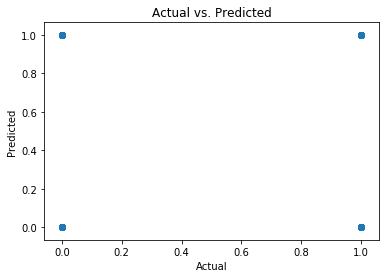

In [29]:
# Create a plot to compare actual labels (Y_test) and the predicted labels (predictions)
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

In [30]:
print("Accuracy Score: %.2f" % accuracy_score(Y_test, y_pred))

Accuracy Score: 0.51


In [31]:
# Get scores for 5 folds over the data
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print(scores)

[0.6        0.60869565 0.52173913 0.44927536 0.55072464]


In [32]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          0       0.55      0.21      0.30        86
          1       0.51      0.82      0.63        85

avg / total       0.53      0.51      0.46       171



In [33]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[18, 68],
       [15, 70]], dtype=int64)

Text(0.5,257.44,'Predicted label')

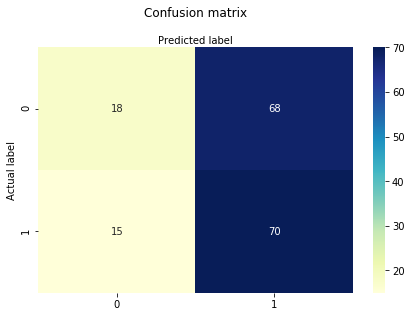

In [34]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.5146198830409356


In [36]:
#Lasso Regression with scikit-learn
#------------------------------------------
#This section creates and measures a LASSO regression model using sklearn.
from sklearn.linear_model import Lasso


In [37]:
# Create an instance of a Lasso Regression model
model = Lasso(alpha=0.3, normalize=True)
model.fit(X_train, Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
# Print the intercept coefficient
print('Estimated intercept coefficient: {}'.format(model.intercept_))

Estimated intercept coefficient: 0.5346820809248555


In [39]:
# Create a dataframe with the features and coefficients
fc_df = pd.DataFrame(list(zip(X.columns, model.coef_)), columns=['features', 'coefficients'])
fc_df.head()

,features,coefficients
0,month,0.0
1,FFMC,0.0
2,DMC,0.0
3,DC,0.0
4,ISI,0.0


In [40]:
len(fc_df)

9

In [41]:
y_pred = model.predict(X_test)

In [42]:
# Get the Mean Squared Error (MSE) for all predictions
mse = mean_squared_error(Y_train, model.predict(X_train))
print("MSE Training Data: {}".format(mse))

MSE Training Data: 0.24879715326272178


In [43]:
# Get the MSE for the test data
print("MSE Test Data: {}".format(mean_squared_error(Y_test, model.predict(X_test))))

MSE Test Data: 0.2514056659239733


In [44]:
print("Variance Score: %.2f" % r2_score(Y_test, y_pred))

Variance Score: -0.01


In [45]:
print(f"Training Data Score: {model.score(X_train, Y_train)}")
print(f"Testing Data Score: {model.score(X_test, Y_test)}")

Training Data Score: 0.0
Testing Data Score: -0.005657055715855286


In [46]:
#Decision Tree
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, target, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
clf.score(X_test, Y_test) 

0.5307692307692308

In [47]:
#Naive Bayes
#--------------

#Import Dependencies
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [48]:
naive_model = GaussianNB()

naive_model.fit(X_train,Y_train)

print(f"Training Data Score: {naive_model.score(X_train, Y_train)}")
print(f"Testing Data Score: {naive_model.score(X_test, Y_test)}")

Training Data Score: 0.48320413436692505
Testing Data Score: 0.4846153846153846


In [49]:
# Create predictions
predictions = naive_model.predict(X_test)
print(predictions)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [50]:
print("Accuracy Score: %.2f" % accuracy_score(Y_test, predictions))

Accuracy Score: 0.48


In [51]:
#Random Forest
#---------------

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.9715762273901809

In [52]:
rf.score(X_test, Y_test)

0.5307692307692308

In [65]:
#Support Vector Machine
#----------------------

from sklearn.svm import SVC 
# using X_train, X_test, y_train, y_test
svm_space = SVC(kernel='rbf')
svm_space.fit(X_train,Y_train)
y_predict = svm_space.predict(X_test)


In [66]:
accuracy = svm_space.score(X_test, Y_test)
print(accuracy)

0.5153846153846153


In [67]:
svm_space.score(X_train, Y_train)

0.9560723514211886

In [68]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.48      0.98      0.64        61
        red       0.75      0.04      0.08        69

avg / total       0.62      0.48      0.34       130



In [69]:
#K Nearest Neighbor
#-------------------
len(X_train)

387

In [70]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = knn.score(X_train, Y_train)
print(acc_knn)

0.7777777777777778


In [71]:
knn.score(X_test, Y_test)

0.5538461538461539

In [60]:
#Neural Networks with Scikit-Learn
#------------------------------------
from sklearn.neural_network import MLPClassifier 
X_train, X_test, Y_train, Y_test = train_test_split(X, target, random_state=42)

neural_network = MLPClassifier(hidden_layer_sizes=(64,16,8), solver="adam", random_state=1)
neural_network.fit(X_train, Y_train)

print(f"Training Data Score: {neural_network.score(X_train, Y_train)}")
print(f"Testing Data Score: {neural_network.score(X_test, Y_test)}")


Training Data Score: 0.5917312661498708
Testing Data Score: 0.6


C:\Users\mariam\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [61]:
#Elastic Net
#------------
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
model.fit(X_train, Y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
print(f"Training Data Score: {model.score(X_train, Y_train)}")
print(f"Testing Data Score: {model.score(X_test, Y_test)}")


Training Data Score: 0.006369524790144965
Testing Data Score: 0.012899480819581477


In [63]:
#K-Means
#-----------
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X_train)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train)

In [64]:
print(f"Training Data Score: {kmeans.score(X_train, Y_train)}")
print(f"Testing Data Score: {kmeans.score(X_test, Y_test)}")


Training Data Score: -1361043.2178231007
Testing Data Score: -427120.865585699
